# Classification

In addition to the regression problem, where the dependent variable is a quantiative variable, there are classification problems where the dependent variable is categorical in nature. For example, in economics we often find problems of a dependent variable with two categories such as the failure of a debtor, the loss of a customer, purchase decisions or fraud. This is also referred to as binary classification. Many models deal with binary classification, some of which can also be adapted to the general case of a dependent variable with at least three or more possible cagegories. We will first look at logistic regression as a natural extension of linear regression and how binary dependent variables can be analyzed using this model. Here, we again proceed similarly to the last chapter: we look at model specification, discuss how the model is estimated from data, and finally focus on the interpretation of an estimated model. Towards the end of the chapter, we discuss a modeling option for dependent variables with more than two categories. 

# Logistic regression

Let's look again at the equation for the prediction function of the linear regression model:

$$
f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p =  \boldsymbol{\beta}^T \boldsymbol{x} 
$$

This is a function that generates a real number based on $p$ variables. Real numbers can take on any value, which is problematic when we are dealing with a dependent variable that can only take on two realizations. Most often, the binary dependent variable is transformed into a dummy encoding, where one category is assigned to the number $1$ and the other category is assigned to the number $0$. For example, non-payment (default) can be assigned to the number $1$ and customers with loan repayment are assigned the number $0$. The record in the next cell contains exactly this coding. This dataset is about credit card default, with a dummy variable (student) and two quantitative predictors (balance, income) as explanatory variables. Balance here refers to the credit card account balance.

In [1]:
import pandas as pd

default_df = pd.read_csv("../data/Default.csv", index_col="Unnamed: 0")
default_df.loc[:, "default"] = default_df.default.apply(lambda x: 1 if x=="Yes" else 0)
default_df.loc[:, "student"] = default_df.student.apply(lambda x: 1 if x=="Yes" else 0)
default_df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


If one would now try to predict the default variable by means of the linear regression model, values without categorical assignment would be predicted. To get around this, the logistic regression model changes the ouput of the linear regression so that it can be interpreted as the probability $P\left(y = 1 | \boldsymbol{x}\right)$. To achieve this, one uses the logistic function, also called the sigmoid function in the machine learning field, the latter actually being an umbrella term for S-shaped functions. The logistic function is generally defined for a number $z$ as follows:

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

In the lower cell we see the S-shaped progression. For logistic regression, the value range of the logistic function is of particular importance. This lies in the range $[0, 1]$, which is why we can interpret the output as probability, since this also lies in the value range $[0, 1]$. What we have declared here as variable $z$ is in the logistic regression model the output of the linear regression function. More precisely, the prediction function of the logistic regression model becomes:

$$
f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = \frac{1}{1 + e^{- \boldsymbol{\beta}^T \boldsymbol{x} }}
$$

Besides the constraint $f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \in [0, 1]$, the other requirements of the probability calculus must also be satisfied. This means that the sum of the discontinuous events adds up to $1$. Thus, for binary classification, it is sufficient to specifically model the probability for one category, since this indirectly models the probability for the other category. By common convention, $f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = P\left(y = 1| \boldsymbol{x} \right)$, which follows that $P\left(y = 0| \boldsymbol{x} \right) = 1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x})$. 

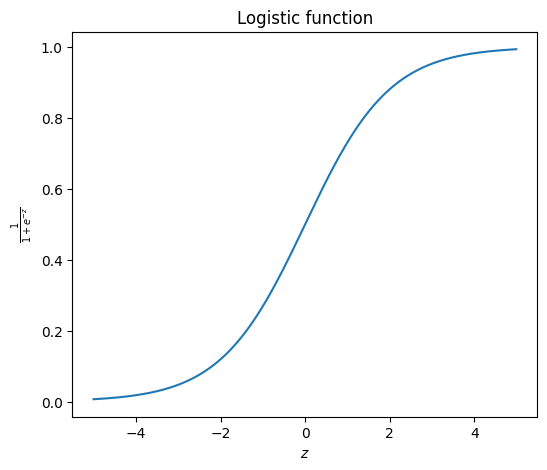

In [2]:
import numpy as np
import matplotlib.pylab as plt

z = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(z, logistic(z))
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\frac{1}{1 + e^{-z}}$")
ax.set_title("Logistic function")
plt.show()

To consider the influence of the parameters of the model, we restrict ourselves to the logistic regression model with one explanatory variable for the lower cell.

$$
f_{\boldsymbol{ \beta }}(x) = \frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right) }}
$$

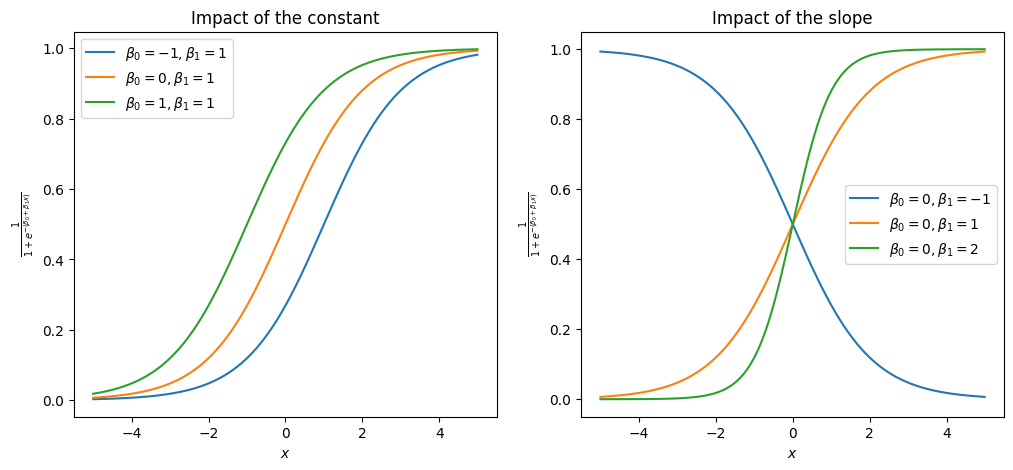

In [3]:
import numpy as np
import matplotlib.pylab as plt

beta_null = [-1, 0, 1]
beta_one = [-1, 1, 2]

x = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(x, logistic(beta_null[0] + beta_one[1] * x), label = r"$\beta_0 = -1, \beta_1 = 1$")
axs[0].plot(x, logistic(beta_null[1] + beta_one[1] * x), label = r"$\beta_0 = 0, \beta_1 = 1$")
axs[0].plot(x, logistic(beta_null[2] + beta_one[1] * x), label = r"$\beta_0 = 1, \beta_1 = 1$")
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$\frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right)}}$")
axs[0].set_title("Impact of the constant")
axs[0].legend()

axs[1].plot(x, logistic(beta_null[1] + beta_one[0] * x), label = r"$\beta_0 = 0, \beta_1 = -1$")
axs[1].plot(x, logistic(beta_null[1] + beta_one[1] * x), label = r"$\beta_0 = 0, \beta_1 = 1$")
axs[1].plot(x, logistic(beta_null[1] + beta_one[2] * x), label = r"$\beta_0 = 0, \beta_1 = 2$")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$\frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right)}}$")
axs[1].set_title("Impact of the slope")
axs[1].legend()
plt.show()


We can see that an increase of the constant $\beta_0$ leads to a parallel shift of the S-curve, while $\beta_1$ controls how steep and in which direction the S-curve runs. Since the output of the model is "only" probabilities, the user still needs to specify a rule at which probability forecast is assigned to each category. This limit is often called cut-off and is usually initially set to the value $c=0.5$. Thus, the following rule applies to the actual forecast:

$$
\hat{y} = 
\begin{cases}
1 & \text{ if } f_{\boldsymbol{ \beta }}(\boldsymbol{x}) > c \\
0 & \text{ else}
\end{cases}
$$

## Training the logistic regression model

As in the case of the linear regression model, given data, the question is which parameters best explain the data. In the case of binary classification, this means that we consider a model to be particularly good and appropriate if high probability predictions are given for the actual respective category. Specifically, $f_{\boldsymbol{ \beta }}(\boldsymbol{x})$ takes high values for $y = 1$ and low values for $y = 0$ in the best case. Analogous to the linear regression model, this can be measured over multiple data points by choosing an appropriate loss function. Without going into the derivation of this loss function in more detail, in the next cell we consider the relationship of values $p$ in the interval $[0, 1]$ and the function: $-\log(p)$ an. We can see that this function has exactly the desired property. Assuming $p$ is the probability forecast for the actual category $y=1$, the higher the forecast for this category, the smaller the value $-\log(p)$.

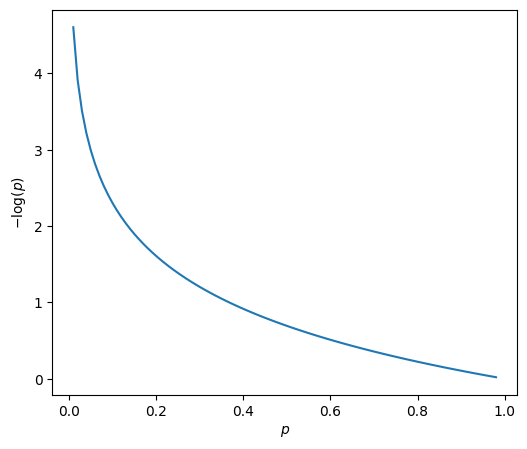

In [4]:
import numpy as np
import matplotlib.pylab as plt

p = np.arange(0.01, 0.99, 0.01)
fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(p, -np.log(p))
ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$-\log(p)$")
plt.show()

For multiple data points with different categorical membership, we must always consider both cases for calculating the loss function. If the observation is the category $y = 1$, the value of the loss function is $-\log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \right)$. If the observation is the category $y = 0$, the value of the loss function is $-\log \left(1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \right)$. Using the dummy coding of $y$, this can be expressed per observation by:

$$
-\log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right)y - \log \left(1 - f_{\boldsymbol{ \beta }}\left(\boldsymbol{x}\right) \right)\left(1 - y\right)
$$

Since the parameters are estimated from multiple data points, the loss function is defined by the average of these values:

$$
L\left(\boldsymbol{y},  f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right) = - \frac{1}{n} \sum_{i=1}^n \log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right)y + \log \left(1 - f_{\boldsymbol{ \beta }}\left(\boldsymbol{x}\right) \right)\left(1 - y\right)
$$

Even if the representation of this loss function looks more formally demanding than the one for the linear regression model, the principle remains roughly the same. The parameters are adjusted to make the model predictions as similar as possible to the actual observations. In the case of binary classification, this means that high probability predictions are made for the actual category. If this succeeds, it can be assumed that the model has recognized by the choice of the parameters which variables have a corresponding influence on the categorization. 

Notation: Although it seems somewhat unnecessary at this point, I would like to introduce a vector-oriented notation of the loss function just defined. For this purpose, we define a one-hot encoding of the dependent variable given by

$$
\tilde{\boldsymbol{y}} = 
\begin{cases}
\begin{pmatrix}
1 \\
0
\end{pmatrix} & \text{ if } y = 1 \\
\begin{pmatrix}
0 \\
1
\end{pmatrix} & \text{ if } y = 0 \\
\end{cases}
$$

Moreover, we define the vector of probability forecasts for both categories as $\boldsymbol{\pi}_{\boldsymbol{\beta}}^T = \begin{pmatrix} f_{\boldsymbol{ \beta }}(\boldsymbol{x}) & 1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \end{pmatrix}$. In this way, the loss function can also be given by:

$$
L\left(\boldsymbol{\tilde{Y}},  f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right) = -\frac{1}{n} \sum_{i=1}^n \tilde{\boldsymbol{y}}_i \log \left( \boldsymbol{\pi}_{\boldsymbol{\beta}, i} \right)
$$

This somewhat more general representation can be used analogously for the case of a dependent variable with more than two categories. More details follow a little later in this chapter.

As an introductory example, we estimate the logistic regression model for the credit card default dataset. In the output we see the estimated parameters of the logistic regression model, where positive influences of the variables balance and income and a negative influence of the variable student become apparent. One should be careful here in interpreting the strength of influence, as the explanatory variables are not in comparable numerical range. While the variable student is dummy coded, the mean value of balance is approximately 835 and that of income 33517. In order to better compare the influence strength, we re-estimate the model with standardized forms of the variables balance and income in the cell below and can see in this way that the variable balance has the greatest influence on the repayment. This means that the higher the charge on the credit card, the higher the probability of default. In addition, students have a lower default rate. According to the p-value of the variable income, a statistically significant non-zero influence cannot be assumed. However, the interpretation would be analogous to the variable balance.

In [5]:
import pandas as pd
import statsmodels.api as sm

default_df = pd.read_csv("../data/Default.csv", index_col="Unnamed: 0")
default_df = pd.get_dummies(default_df, dtype = "int")
default_df.drop(["default_No", "student_No"], axis = 1, inplace = True)
default_df.rename({"default_Yes": "default", "student_Yes": "student"}, axis = 1, inplace = True)
X = default_df.drop(["default"], axis = 1)
X = sm.add_constant(X)
y = default_df.default

logistic_regression = sm.Logit(y, X)
results = logistic_regression.fit()
print(results.summary())

y_hat = (results.predict(X) > 0.50) * 1

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.4619
Time:                        13:53:34   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0

In [6]:
import pandas as pd
import statsmodels.api as sm

default_df = pd.read_csv("../data/Default.csv", index_col="Unnamed: 0")
default_df = pd.get_dummies(default_df, dtype = "int")
default_df.drop(["default_No", "student_No"], axis = 1, inplace = True)
default_df.rename({"default_Yes": "default", "student_Yes": "student"}, axis = 1, inplace = True)
default_df.loc[:, ["balance", "income"]] = (default_df.loc[:, ["balance", "income"]] - default_df.loc[:, ["balance", "income"]].mean()) / default_df.loc[:, ["balance", "income"]].std()
X = default_df.drop(["default"], axis = 1)
X = sm.add_constant(X)
y = default_df.default

logistic_regression = sm.Logit(y, X)
results = logistic_regression.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.4619
Time:                        13:53:34   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9752      0.194    -30.849      0.000      -6.355      -5.596
balance        2.7748      0

## Alternative interpretation of the logistic regression model

Let us assume, we use the probability threshold $c = 0.5$ to assign probability predictions to categories. The decision rule:

$$
\hat{y} = 
\begin{cases}
1 & \text{if } f_{\beta} \left( \boldsymbol{\beta}^T \boldsymbol{x} \right) > 0.5 \\
0 & \text{if } f_{\beta} \left( \boldsymbol{\beta}^T \boldsymbol{x} \right) \leq 0.5 
\end{cases}
$$

is equivalent to:

$$
\hat{y} = 
\begin{cases}
1 & \text{if } \boldsymbol{\beta}^T \boldsymbol{x}  > 0 \\
0 & \text{if } \boldsymbol{\beta}^T \boldsymbol{x}  \leq 0 
\end{cases}
$$

This means 

$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p = 0
$$

is the hyperplane which sets the decision boundary. For instance, let us take a look at a fictional example with two predictors $x_1, x_2$, the decision line becomes:

$$
\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0
$$

Reformulating, we get:

$$
x_2 = - \frac{\beta_0}{\beta_2} - \frac{\beta_1}{\beta_2} x_2
$$

The graph below illustrates the decision line, categories as well as the decision regions for a fictional example. This highlights the decision process behind the logistic model and shows that it still is a classifier which builds its rule upon a model that only captures linear relationships (because the decision line is restricted to a linear relationship between the feature variables).

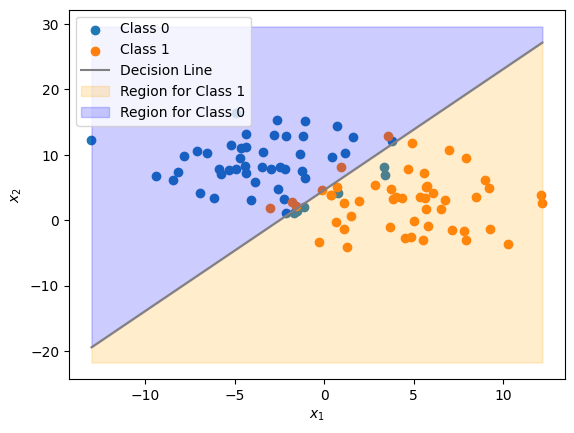

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression

def classifier_decision(beta, x1):
    b0, b1, b2 = beta
    a = b0 / b2
    b = b1 / b2
    return -(a + b * x1)

X, y_cat = make_blobs(100, 2, centers=2, cluster_std=4, random_state=42)

classifier = LogisticRegression(penalty=None)
classifier.fit(X, y_cat)

x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.001)
decision_boundary = classifier_decision(np.concatenate((classifier.intercept_, classifier.coef_.flatten())), x1)

plt.scatter(X[y_cat == 0, 0], X[y_cat == 0, 1], label="Class 0")
plt.scatter(X[y_cat == 1, 0], X[y_cat == 1, 1], label="Class 1")
plt.plot(x1, decision_boundary, c="grey", label="Decision Line")
plt.fill_between(x1, decision_boundary, min(plt.ylim()), color='orange', alpha=0.2, label='Region for Class 1')
plt.fill_between(x1, decision_boundary, max(plt.ylim()), color='blue', alpha=0.2, label='Region for Class 0')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend(loc = "upper left")
plt.show()

## Evaluation of the goodness of the logistic regression model

The goal of the logistic regression model is to predict the categories as well as possible based on the information of the independent variables. Thus, often the first look of the model is at the hit rate (accuracy), where the frequency of correct predictions is determined. Let us define the prediction accuracy for a single variable with:

$$
acc = 
\begin{cases}
1 & \text{ if } y = \hat{y} \\
0 & \text{ else }
\end{cases}
$$

so the average hit rate is defined by:

$$
AC = \frac{1}{n} \sum_{i = 1}^n acc_i
$$

If we determine this for the default data set, we see a hit rate of $AC = 0.9732$, which seems very good at first glance. As with the linear regression model, however, one should always compare the model with a meaningful benchmark. For classifications, the frequency of the category with higher occurrence is always a good value for this. 

In [8]:
from sklearn.metrics import accuracy_score

print(f"The accuracy rate for the default data set is equal to: {accuracy_score(y, y_hat)}")

The accuracy rate for the default data set is equal to: 0.9732


If we determine this, we see that the frequency of the failure is only at:

In [9]:
print(f"The frequency of default in the data set is: {y.mean():.4f}")

The frequency of default in the data set is: 0.0333


This means that if we simply predicted no failure for all observations, we would achieve a hit rate of $1 - 0.0333 = 0.9667$. Thus, looking only at the hit rate of the model can be misleading. This is especially true for unbalanced data, where at least one category occurs at a significantly higher frequency than the other categories. To get a somewhat detailed picture of the goodness of the logistic regression model, it is first advisable to look at the confusion matrix. In the confusion matrix, for each category, the predicted categories are matched with the actual ones. The lower cell shows this matrix for the default data set and the logistic regression model. On the x-axis the predicted categories of the model are plotted, on the y-axis those of the actual realizations. Thus, on the diagonal are the occurences with correct prediction. Here, however, a distinction can be made. Predictions and realizations of the category of interest are called "positive". Thus, it does not have to be a positive case, but in our example, a positive prediction would be the prediction that a failure will occur and a positive realization would be an actual failure accordingly. The number of True Positives (TP) are thus in the lower right corner of the matrix, in our example it comes to $104$ TP. Similarly, True Negatives (TN) are correct predictions of a non-failure. The number of these are given in the upper left corner of the matrix as $9634$. Now we come to the two possible errors of the model. On the one hand, it can happen that the model predicts a failure and no failure occurs. This is called a false positive (FP) and is found in the upper right corner of the matrix ($33$ cases in our example). The other error that can happen is that the model predicts no failure, but a failure does occur. This is called a False Negative (FN) and represents the more common source of failure in our example ($229$ instances). Depending on the problem, this asymmetry is very important. For example, it may be more tolerable for medical tests to initially misdiagnose diseases in lieu of overlooking them. It may also be more important for a bank to predict actual defaults than to erroneously assign individuals to the risk group of those who will not repay the loan (in full). To better differentiate these errors, the precision and recall of the model is often included. 

The Precision is about:

$$
\text{precision} = \frac{TP}{TP + FP}
$$

where this metric indicates the ability of the model to generate as few false positive predictions as possible. The recall is defined by:

$$
\text{recall} = \frac{TP}{TP + FN}
$$

it describes the ability of the model to identify the positive categories of the dependent variable. Since both measures are important sources of information on the quality of the model, they can be combined in the F1 score:

$$
F_1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

In our example, both the values of the confusion matrix and the key figures just described show that the model has more problems with correctly forecasting actual failures than with making too many false positive forecasts. In general, it makes sense to interpret possible influences of independent variables only if the model is able to explain reality satisfactorily. However, the question of what is considered satisfactory can only be determined using econometric goals or expert knowledge. It should be noted that there are other metrics for assessing binary classification problems, which we refrain from presenting here. Moreover, the metrics presented here are also suitable for binary classification models other than logistic regression.

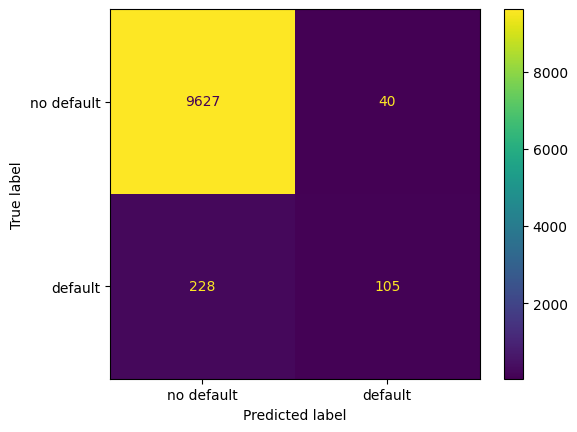

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pylab as plt

cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = ["no default", "default"])
disp.plot()
plt.show()

In [11]:
print(f"The precision of the model is: {precision_score(y, y_hat):.4f}")
print(f"The recall of the model is: {recall_score(y, y_hat):.4f}")
print(f"The f1 score of the model is: {f1_score(y, y_hat):.4f}")

The precision of the model is: 0.7241
The recall of the model is: 0.3153
The f1 score of the model is: 0.4393


## Assessment of the influence of the independent variables

Using the logistic function changes the interpretation of the influence of the independent variables. For this purpose, we consider in the lower cell the special case of a logistic regression model with one variable and the parameters $\beta_0 = 0$ and $\beta_1 = 1$. In contrast to linear regression, the influence of the variable $x$ on the probability forecast is non-linear. This means that depending on the current value of $x$, a change of this value by one unit leads to different changes in the probability forecast. For example, if $x$ increases from $0$ to $1$, the probability forecast changes from $0.50$ to $0.73$. However, if $x$ increases from $2$ to $3$, for example, the probability forecast only changes from $0.88$ to $0.95$. This means that the effect of increasing $x$ decreases when $x$ already has a relatively high value. 

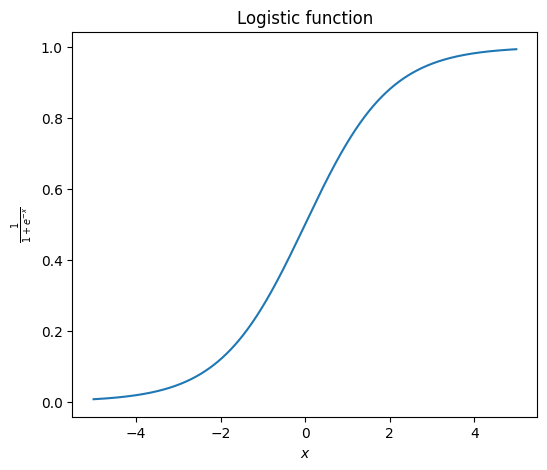

In [12]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(x, logistic(z))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\frac{1}{1 + e^{-x}}$")
ax.set_title("Logistic function")
plt.show()

Mathematically it can be shown that:

$$
\log \left( \frac{P(y = 1| \boldsymbol{x})}{1 - P(y = 1| \boldsymbol{x})}  \right) = \boldsymbol{\beta}^T \boldsymbol{x}
$$

So the logarithmized ratio of the probability forecasts for the respective categories is linear again. To be honest, however, I must admit that I do not find this kind of interpretation particularly insightful, since I am not used to thinking in logarithmic probability ratios. Thus, all that remains for me to say is that the direction of the independent variable's effect can be identified by its sign. Which local influence an independent variable has can only be quantified depending on its current value.

# Multinomial and Softmax Regression

Once the idea of logistic regression is understood, it is relatively easy to adapt this idea to the case of a dependent variable with more than two categories. Two modeling approaches are popular for this purpose, the multinomial regression model and the softmax regression. In the multinomial model, $K-1$ parameter vectors $\boldsymbol{\beta}_k$ are used for $K$ categories, and in the softmax regression $K$ parameter vectors $\boldsymbol{\beta}_k$ are used. No matter which model is used, we understand by a parameter vector:

$$
\boldsymbol{\beta}_k = 
\begin{pmatrix}
\beta_{k0} \\
\beta_{k1} \\
\vdots \\
\beta_{kp} \\
\end{pmatrix}
$$

if $p$ independent variables are included in the model. In the multinomial model, we first have a linear regression alike function for the first $K-1$ categories:

$$
\beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + ... + \beta_{1p} x_p =  \boldsymbol{\beta}_1^T \boldsymbol{x} \\
\beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + ... + \beta_{2p} x_p =  \boldsymbol{\beta}_2^T \boldsymbol{x} \\
\vdots \\
\beta_{(K-1)0} + \beta_{(K-1)1} x_1 + \beta_{(K-1)2} x_2 + ... + \beta_{(K-1)p} x_p =  \boldsymbol{\beta}_{(K-1)}^T \boldsymbol{x} \\
$$

As with the logistic regression model, we would have the problem for these values that the respective output is any real number, but we want to predict individual categories. Also for this type of modeling, instead of actual categories, probabilities $P\left(y = k | \boldsymbol{x}\right)$ are predicted. However, translating the real numbers into probabilities requires a similar "trick" as using logistic regression. For a model with multiple categories, all probability predictions must hold that they are in the range of values $[0, 1]$. In addition, they must sum to $1$ because the categories are disjoint events. To achieve this, the real number values for each category in the multinomial model are transformed by:

$$
P\left(y = k | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_k} \left( \boldsymbol{x} \right) = \frac{e^{ \boldsymbol{\beta}_k^T \boldsymbol{x}}}{1 + \sum_{l=1}^{K-1} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

The probability forecast of category $K$ (which, by the way, can be chosen arbitrarily), results from the $K-1$ probability forecasts:

$$
P\left(y = K | \boldsymbol{x}\right) = 1 - \sum_{l=1}^{K-1} P\left(y = l | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_K} \left( \boldsymbol{x} \right) = \frac{1}{1 + \sum_{l=1}^{K-1} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

In softmax regression, regression lines are formed for all $K$ categories:

$$
\beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + ... + \beta_{1p} x_p =  \boldsymbol{\beta}_1^T \boldsymbol{x} \\
\beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + ... + \beta_{2p} x_p =  \boldsymbol{\beta}_2^T \boldsymbol{x} \\
\vdots \\
\beta_{K0} + \beta_{K1} x_1 + \beta_{K2} x_2 + ... + \beta_{Kp} x_p =  \boldsymbol{\beta}_{K}^T \boldsymbol{x} \\
$$

Each real number of the respective straight lines is transformed into probabilities by means of the softmax function:

$$
P\left(y = k | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_k} \left( \boldsymbol{x} \right) = \frac{e^{ \boldsymbol{\beta}_k^T \boldsymbol{x}}}{\sum_{l=1}^{K} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

Thus, $p+1$ more parameters must be estimated for the softmax model, yet this approach is somewhat more popular in machine learning, whereas multinomial regression is increasingly used in statistical analysis. Even though these models use more parameters and more model equations than logistic regression, the way logistic regression is modeled remains similar. The starting point is always a real number which stems from linear regression function, which is transformed using an appropriate function depending on the modeling needs. Also the models for $K>2$ categories, can be estimated under the same loss function. Let $\tilde{\boldsymbol{y}}$ be a $K$ dimensional one-hot vector that has value $1$ at position $k$ and $0$ at all other positions. Moreover, let $ \boldsymbol{\pi}_{B} $ be the vector of probability forecasts, then all parameters $B$ of the model are obtained by minimizing the loss function:

$$
L\left(\boldsymbol{y},  \boldsymbol{f}_{\boldsymbol{ B }}(\boldsymbol{x})\right) = -\frac{1}{n} \sum_{i=1}^n \tilde{y}_i \log \left( \boldsymbol{\pi}_{\boldsymbol{B}, i} \right)
$$

As with logistic regression, the functions used for transformation into probabilities are non-linear functions. This means that the signs of the parameters can be interpreted in their direction of effect on the respective category probability, but the strength of the influence on the respective probability predictions depends on the current value of the independent variable. When it comes to assessing the quality of the models, the key figures from the binary classification can be used partly in the same way (accuracy, confusion matrix) and partly in an adapted form. Since regression problems and binary classification problems are usually more common in economics, we will not give examples and further illustrations for classifying more than two categories. In addition, I would like to point out that the models discussed here were developed for nomial categories. If the variable is an ordinally scaled dependent variable, the ranking of the variable must also be taken into account. This is done, for example, in the ordinal regression model.